In [ ]:
'''
GE 3D Print Inteligence
NDA Protected Data
'''

'\nGE 3D Print Inteligence\nNDA Protected Data\n'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imutils import contours
import imutils
import glob
import os
import pandas as pd
import decimal
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
!pip3 install npTdms
from nptdms import TdmsFile

# to display images
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,6)

     |████████████████████████████████| 174kB 6.7MB/s 
  Created wheel for npTdms: filename=npTDMS-1.1.0-py2.py3-none-any.whl size=93742 sha256=a28761c712d47dc202c1196c672a43b6ed4b03caeb45cca917efdfd64ecefe1e
  Stored in directory: /root/.cache/pip/wheels/2f/c1/3a/b3a175814a26285726652833e20bc1023b6a6699b8f11c6fd2
Successfully built npTdms


In [ ]:
'''
Part 1: Load the files from a private Google Drive
'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def show_image(img):
    imgplot = plt.imshow(img)
    plt.show()
    return ''

In [ ]:
# VIDEO 1
path = '/content/drive/MyDrive/GE_data_x/frames_162_hassan'
video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 17.20.17.799283-00181.avi'
tdms_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/182_tdms_data_v2.csv'

video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 16.57.37.228622-00161.avi'
tdms_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/162_tdms_data_v2.csv'
# load the tdms 
df_tdms = pd.read_csv(tdms_file_path)
print(df_tdms.head())
cap = cv2.VideoCapture(video_file_path)
print('Frames of video {}'.format(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))))
print('Start Frame tdms {}'.format(str(df_tdms['Frame_Index'].min())))
print('End Frame tdms {}'.format(str(df_tdms['Frame_Index'].max())))

   Frame_Index  Layer      x     y  ...  change_bool  LineIndex  LineID  BlockID
0       611889    162  17475 -6823  ...            1       5416      33       14
1       611890    162  17492 -6803  ...            0       5416      33       14
2       611891    162  17489 -6808  ...            0       5416      33       14
3       611892    162  17469 -6839  ...            0       5416      33       14
4       611893    162  17460 -6865  ...            0       5416      33       14

[5 rows x 10 columns]
Frames of video 671344
Start Frame tdms 611889
End Frame tdms 665391


In [ ]:
# load a frame
ret_val, img = cap.read()

In [ ]:
[start_y,end_y, start_x,end_x] = [10,60,10,60]

img = img[start_y:end_y, start_x:end_x]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Demo Calculation

In [ ]:
# convolute with proper kernels

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)  # y

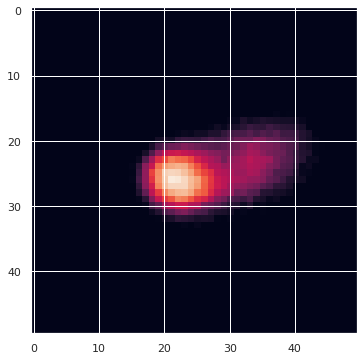

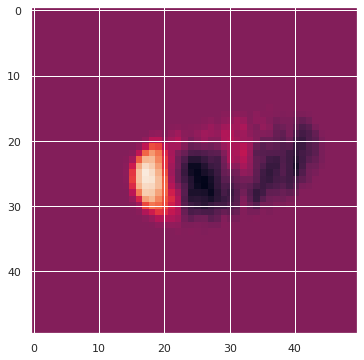

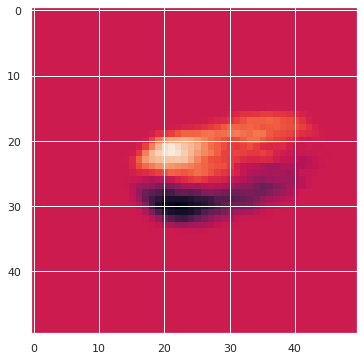

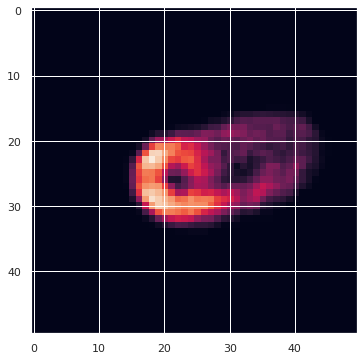

''

In [ ]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(img, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(img, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
show_image(img)
show_image(grad_x)
show_image(grad_y)
           
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)


grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
grad2 = np.sqrt(np.power(abs_grad_x,2)+np.power(abs_grad_y,2))
show_image(grad)


In [ ]:
grad[25,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   3,  46, 105, 126, 125, 112,  80,  49,  47,  65,  89,  99,
        87,  72,  53,  30,  22,  12,   9,  15,  32,  47,  55,  48,  41,
        52,  51,  24,  11,   7,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [ ]:
# generate empty the dataframe
direction_list = ['_col','_rows']
df_columns = ['Frame_Index']
columns = ['gradient_max_value','gradient_min_value','gradient_width','gradient_full_width','slope_min_max']
for direction in direction_list:
    columns_aux = [i+direction for i in columns]
    df_columns+=columns_aux
df = pd.DataFrame(df_columns)

0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
2 0 -36 5
gradient_full_width increased
22 0 -35 14
gradient_full_width increased
42 0 -37 17
gradient_full_width increased
54 0 -30 23
gradient_full_width increased
66 0 -30 27
gradient_full_width increased
96 0 -22 29
gradient_full_width increased
130 0 -19 30
gradient_full_width increased
164 0 -19 31
gradient_full_width increased
174 0 -18 31
152 0 -18 31
126 0 -17 30
125 0 -18 30
140 0 -18 29
159 0 -18 26
169 0 -18 26
160 0 -19 24
129 0 -20 21
90 0 -22 20
34 0 -22 14
3 0 -24 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5


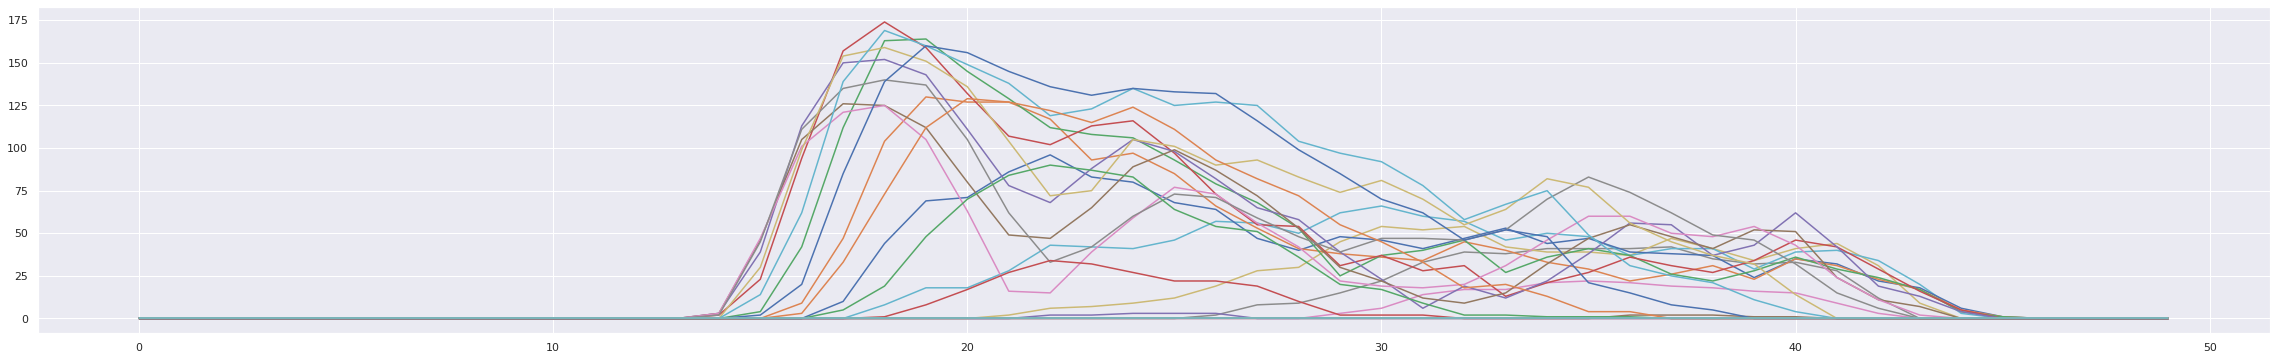

In [ ]:
# sobel gradient
nrows,ncols = grad.shape
rotated = grad
selected_row = 0
last_full_width = 0
frame_index = 0


gradient_max_value,gradient_min_value,gradient_width,gradient_full_width = (-1,-1,-1,-1)
for i in range(nrows):  
    aux = (rotated[i,:])
    x = np.array([i for i in range(nrows)])
    plt.plot(x, aux, label='row {}'.format(str(i)))  
    # res.append(aux)
    gradient_max_value = np.max(aux, axis=0)
    gradient_min_value = np.min(aux, axis=0)
    gradient_width = np.argmin(aux, axis=0) - np.argmax(aux, axis=0)
    try:
        change_sign = (np.diff(np.sign(aux)) != 0)*1
        itemindex = np.where(change_sign==1)
        itemindex = np.array(itemindex)
        gradient_full_width = np.max(itemindex) - np.min(itemindex)
    except:
        full_width=0
    print(gradient_max_value,gradient_min_value,gradient_width,gradient_full_width)
    if (gradient_full_width > last_full_width):
        selected_row = i
        print('gradient_full_width increased')
        last_full_width = gradient_full_width
        slope_min_max = (gradient_max_value-gradient_min_value)/gradient_full_width
        slope_min_max = np.round(slope_min_max,1)
        df.loc[frame_index,df_columns[1:6]] = [gradient_max_value,gradient_min_value,gradient_width,gradient_full_width,slope_min_max]
plt.show() 

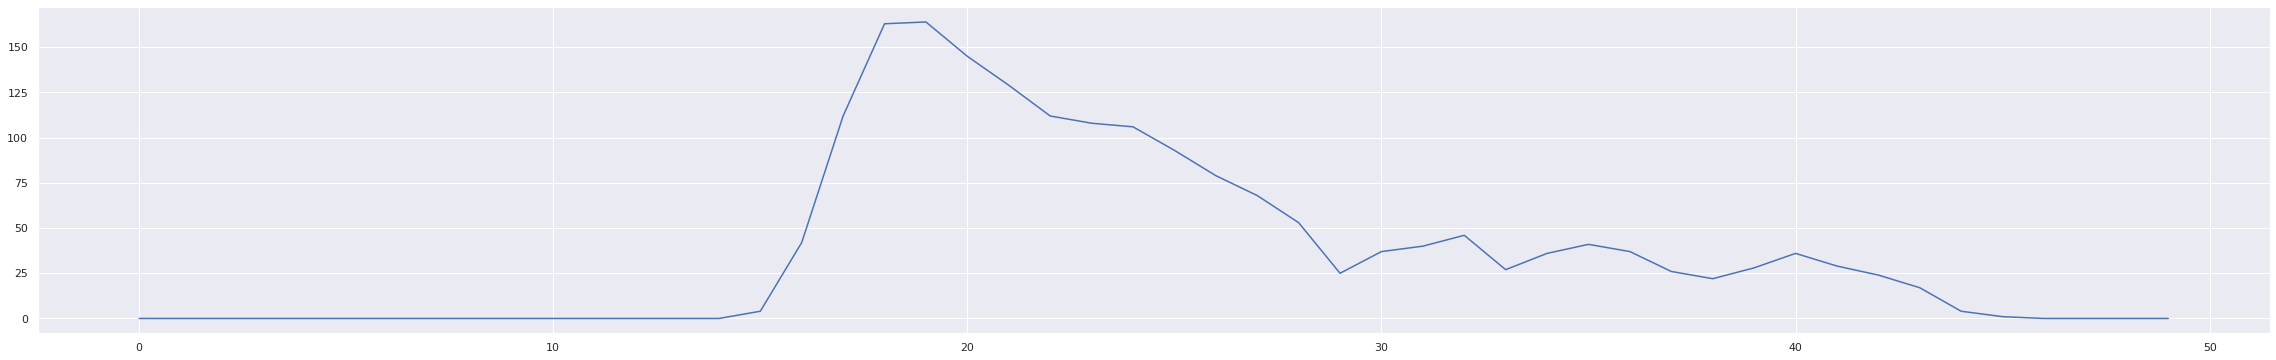

In [ ]:
i = selected_row
aux = rotated[i,:]
x = np.array([i for i in range(nrows)])
plt.plot(x, aux, label='row {}'.format(str(i)))  

0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
0.0 0.0 0 -1
4.0 0.0 -37 5
gradient_full_width increased
14.42 0.0 -31 14
gradient_full_width increased
15.81 0.0 -33 17
gradient_full_width increased
15.62 0.0 -29 23
gradient_full_width increased
15.81 0.0 -42 27
gradient_full_width increased
15.62 0.0 -32 29
gradient_full_width increased
15.81 0.0 -26 30
gradient_full_width increased
15.81 0.0 -16 31
gradient_full_width increased
15.81 0.0 -30 31
15.234 0.0 -34 31
15.62 0.0 -18 30
14.49 0.0 -16 30
15.555 0.0 -15 29
15.555 0.0 -20 26
15.3 0.0 -32 26
15.62 0.0 -29 24
15.62 0.0 -20 21
15.555 0.0 -18 20
15.62 0.0 -21 14
6.0 0.0 -25 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5
0.0 0.0 0 5


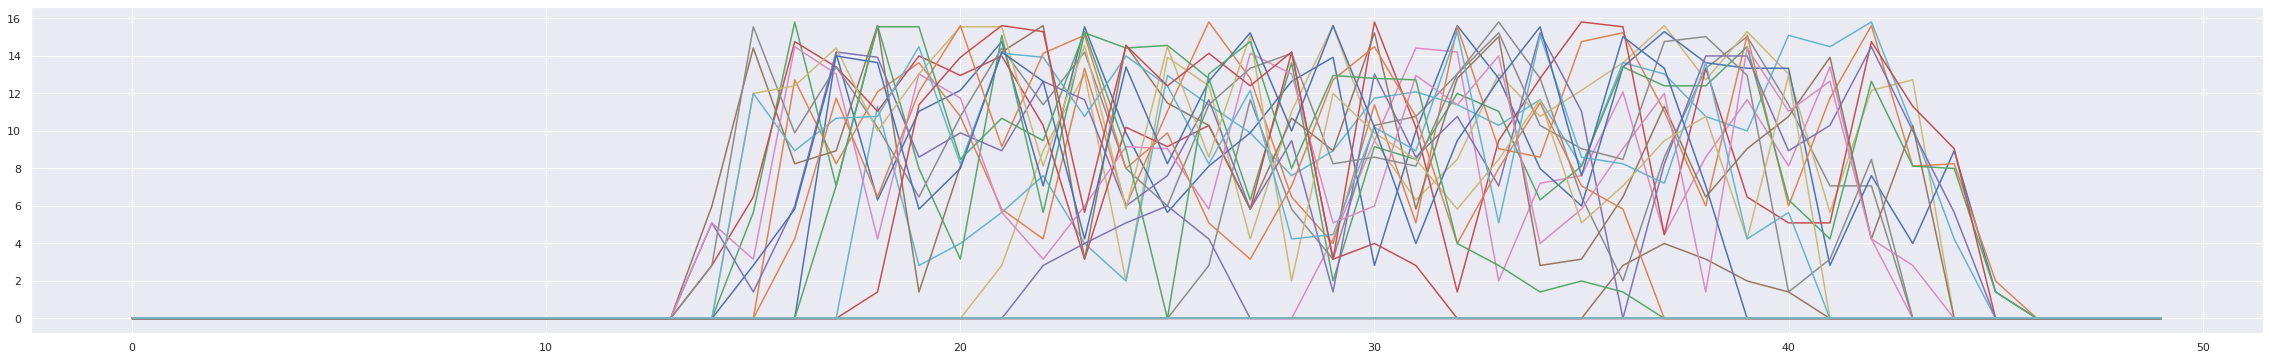

In [ ]:
# sum of squares
# sobel gradient
nrows,ncols = grad2.shape
rotated = grad2
selected_row = 0
last_full_width = 0
frame_index = 0


gradient_max_value,gradient_min_value,gradient_width,gradient_full_width = (-1,-1,-1,-1)
for i in range(nrows):  
    aux = (rotated[i,:])
    x = np.array([i for i in range(nrows)])
    plt.plot(x, aux, label='row {}'.format(str(i)))  
    # res.append(aux)
    gradient_max_value = np.max(aux, axis=0)
    gradient_min_value = np.min(aux, axis=0)
    gradient_width = np.argmin(aux, axis=0) - np.argmax(aux, axis=0)
    try:
        change_sign = (np.diff(np.sign(aux)) != 0)*1
        itemindex = np.where(change_sign==1)
        itemindex = np.array(itemindex)
        gradient_full_width = np.max(itemindex) - np.min(itemindex)
    except:
        full_width=0
    print(gradient_max_value,gradient_min_value,gradient_width,gradient_full_width)
    if (gradient_full_width > last_full_width):
        selected_row = i
        print('gradient_full_width increased')
        last_full_width = gradient_full_width
        slope_min_max = (gradient_max_value-gradient_min_value)/gradient_full_width
        slope_min_max = np.round(slope_min_max,1)
        df.loc[frame_index,df_columns[1:6]] = [gradient_max_value,gradient_min_value,gradient_width,gradient_full_width,slope_min_max]
plt.show() 

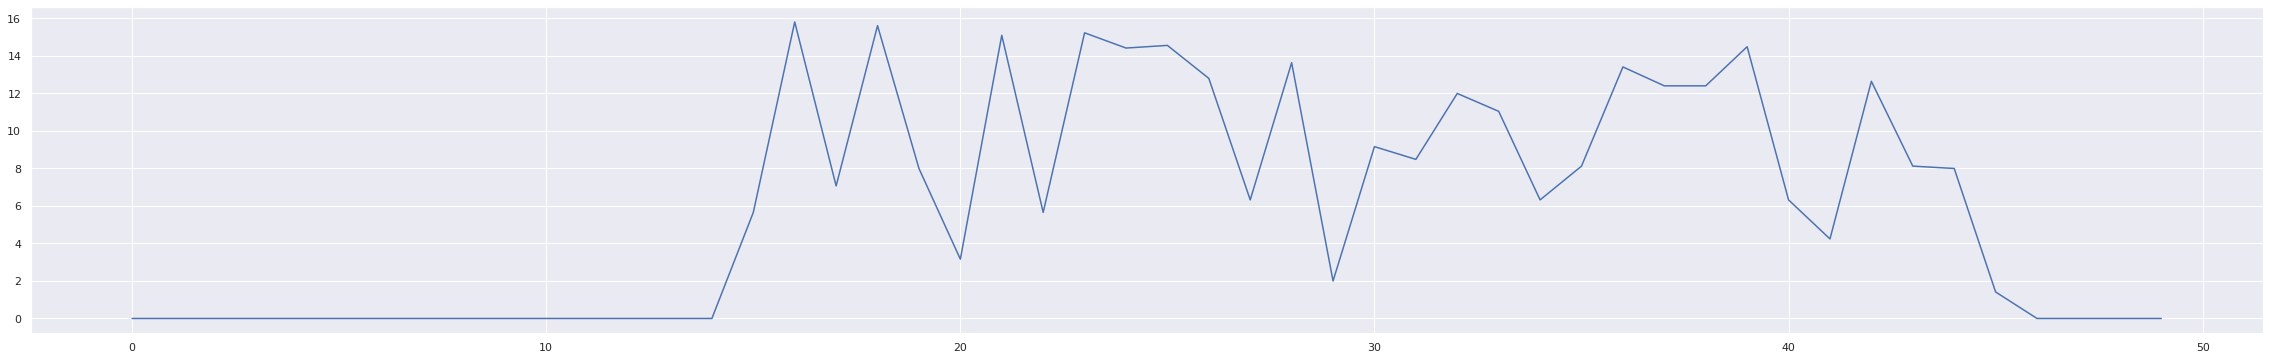

In [ ]:
i = selected_row
aux = rotated[i,:]
x = np.array([i for i in range(nrows)])
plt.plot(x, aux, label='row {}'.format(str(i)))  

In [ ]:
aux

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  5.656,
       15.81 ,  7.07 , 15.62 ,  8.   ,  3.162, 15.1  ,  5.656, 15.234,
       14.42 , 14.56 , 12.805,  6.324, 13.64 ,  2.   ,  9.164,  8.484,
       12.   , 11.05 ,  6.324,  8.125, 13.414, 12.41 , 12.41 , 14.49 ,
        6.324,  4.242, 12.65 ,  8.125,  8.   ,  1.414,  0.   ,  0.   ,
        0.   ,  0.   ], dtype=float16)

In [ ]:
selected_row

22

In [ ]:
rotated[selected_row,:]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  5.656,
       15.81 ,  7.07 , 15.62 ,  8.   ,  3.162, 15.1  ,  5.656, 15.234,
       14.42 , 14.56 , 12.805,  6.324, 13.64 ,  2.   ,  9.164,  8.484,
       12.   , 11.05 ,  6.324,  8.125, 13.414, 12.41 , 12.41 , 14.49 ,
        6.324,  4.242, 12.65 ,  8.125,  8.   ,  1.414,  0.   ,  0.   ,
        0.   ,  0.   ], dtype=float16)

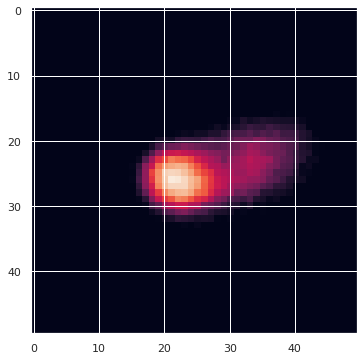

''

In [ ]:
show_image(img)

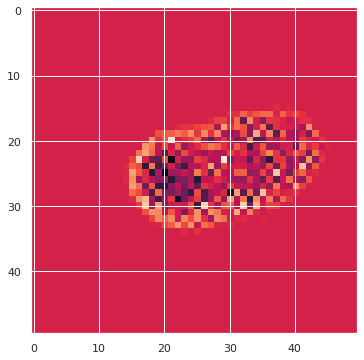

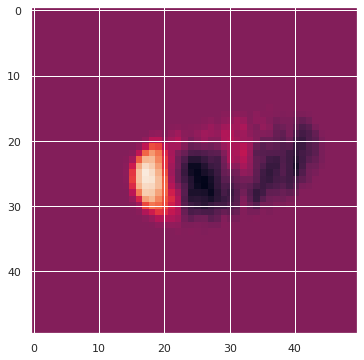

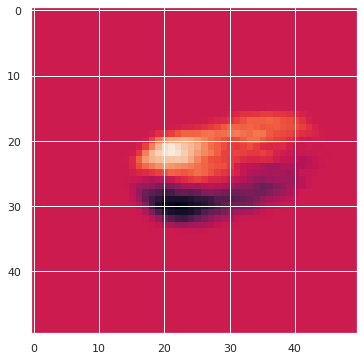

''

In [ ]:
show_image(laplacian)
show_image(sobelx)
show_image(sobely)

# Functions

In [ ]:
def show_image(img):
    imgplot = plt.imshow(img)
    plt.show()
    return ''

In [ ]:
def save_df(df,layer,date,frame_index):
    results_output_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/out/'
    filename = 'frames_tdms_{}_{}_gradient_{}.csv'.format(layer,date,frame_index)
    file_path = results_output_path + filename
    # df.to_csv(file_path, index = False) 
    df.to_csv(file_path) 
    print(filename + ' exported')
    return

In [ ]:
from numpy import random
from scipy.spatial import distance

# closest point to a node, to calculate the side of a rectangle
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return nodes[closest_index]

In [ ]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated

# Generate data

In [ ]:
# generate empty the dataframe
direction_list = ['_col','_rows']
df_columns = ['Frame_Index']
columns = ['gradient_max_value','gradient_min_value','gradient_width','gradient_full_width','slope_min_max']
for direction in direction_list:
    columns_aux = [i+direction for i in columns]
    df_columns+=columns_aux

In [ ]:
df = pd.DataFrame(columns=df_columns)
df

,Frame_Index,gradient_max_value_col,gradient_min_value_col,gradient_width_col,gradient_full_width_col,slope_min_max_col,gradient_max_value_rows,gradient_min_value_rows,gradient_width_rows,gradient_full_width_rows,slope_min_max_rows


In [ ]:
'''
Part 2 : Input parameters and variables to store data
'''
results_output_path = "./out/"

[start_y,end_y, start_x,end_x] = [10,60,10,60]



In [ ]:
from datetime import date

In [ ]:
layer_id = 182
if(layer_id==182):
    video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 17.20.17.799283-00181.avi'
    START_FRAME = 288229-1
    END_FRAME = 317918
elif(layer_id==162):
    video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 16.57.37.228622-00161.avi'
    START_FRAME = 612251
    END_FRAME = 665391

cap = cv2.VideoCapture(video_file_path)
today_str = date.today().strftime("%d_%b")
print('Frames of video {}'.format(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))))

frame_index = -1
while cap.isOpened():
    ret_val, image = cap.read()
    frame_index +=1

    # Every 1000 frames output a message
    if frame_index % 100 == 0:
      print("Processing frame " + str(frame_index))

    if (frame_index < START_FRAME):
      continue

    if frame_index % 10000 == 0:
      save_df(df,layer_id,today_str,frame_index)
      df = pd.DataFrame(columns=df_columns)

    if frame_index > END_FRAME:
      save_df(df,layer_id,today_str,frame_index)
      df = pd.DataFrame(columns=df_columns)
      break

    build_area_roi = image[start_y:end_y, start_x:end_x]
    build_area_roi = cv2.cvtColor(build_area_roi, cv2.COLOR_BGR2GRAY)

    df.loc[frame_index,'Frame_Index'] = frame_index

    # calculate the rectangle

    try:
        cnts = cv2.findContours(build_area_roi, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)

        sorted_contours = sorted(cnts, key=cv2.contourArea, reverse=True)

        # Get top 2 contours (2nd largest if available) and combine their points to get encompassing rectangle.
        largest_contour = sorted_contours[0]
        top_contour_points = largest_contour


        rotated_rectangle = cv2.minAreaRect(top_contour_points)
        rotated_box = cv2.boxPoints(rotated_rectangle)
        rotated_box = np.int0(rotated_box)


        # coordinates
        x0,y0 = rotated_box[0]
        x1,y1 = rotated_box[1]
        x2,y2 = rotated_box[2]
        x3,y3 = rotated_box[3]

        node1 = rotated_box[0]
        node2 = closest_node(rotated_box[0], rotated_box[1:])

        side = node2 - node1
        angle = np.arctan(side[1]/side[0])
        angle # in radians
        angle = np.degrees(angle)

        center = (0.25*(x0+x1+x2+x3),0.25*(y0+y1+y2+y3))
        rotated = rotate(build_area_roi,angle,center)

        nrows,ncols = rotated.shape
        rotated = rotated.astype(np.int16)

        # values
        # res = []
        selected_row = 0
        last_full_width = 0
        gradient_max_value,gradient_min_value,gradient_width,gradient_full_width = (-1,-1,-1,-1)

    # iterate over rows
    
        for i in range(nrows):  
            aux = (rotated[i,1:] - rotated[i,:-1])
            aux_2 = (aux[1:] - aux[:-1])
            # plt.plot(x, aux, label='row {}'.format(str(i)))
            # res.append(aux)
            gradient_max_value = np.max(aux, axis=0)
            gradient_min_value = np.min(aux, axis=0)
            gradient_width = np.argmin(aux, axis=0) - np.argmax(aux, axis=0)
        try:
            change_sign = (np.diff(np.sign(aux)) != 0)*1
            itemindex = np.where(change_sign==1)
            itemindex = np.array(itemindex)
            gradient_full_width = np.max(itemindex) - np.min(itemindex)
        except:
            full_width=0
      # print(gradient_max_value,gradient_min_value,gradient_width,gradient_full_width)
        if (gradient_full_width > last_full_width):
            selected_row = i
            # print('gradient_full_width increased')
            last_full_width = gradient_full_width
            slope_min_max = (gradient_max_value-gradient_min_value)/gradient_full_width
            slope_min_max = np.round(slope_min_max,1)
            df.loc[frame_index,df_columns[1:6]] = [gradient_max_value,gradient_min_value,gradient_width,gradient_full_width,slope_min_max]
      

    # iterate over columns
        last_full_width = 0
        for i in range(ncols):  
            aux = (rotated[1:,i] - rotated[:-1,i])
            aux_2 = (aux[1:] - aux[:-1])
            # plt.plot(x, aux, label='row {}'.format(str(i)))
            # res.append(aux)
            gradient_max_value = np.max(aux, axis=0)
            gradient_min_value = np.min(aux, axis=0)
            gradient_width = np.argmin(aux, axis=0) - np.argmax(aux, axis=0)
        try:
            change_sign = (np.diff(np.sign(aux)) != 0)*1
            itemindex = np.where(change_sign==1)
            itemindex = np.array(itemindex)
            gradient_full_width = np.max(itemindex) - np.min(itemindex)
        except:
            full_width=0
      # print(gradient_max_value,gradient_min_value,gradient_width,gradient_full_width)
        if (gradient_full_width > last_full_width):
            selected_col = i
            last_full_width = gradient_full_width
            slope_min_max = (gradient_max_value-gradient_min_value)/gradient_full_width
            slope_min_max = np.round(slope_min_max,1)
            df.loc[frame_index,df_columns[6:11]] = [gradient_max_value,gradient_min_value,gradient_width,gradient_full_width,slope_min_max]
    except:
        # print('except rectangle')
        df.loc[frame_index,df_columns[1:11]] = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]

Frames of video 317919
Processing frame 0
Processing frame 100
Processing frame 200
Processing frame 300
Processing frame 400
Processing frame 500
Processing frame 600
Processing frame 700
Processing frame 800
Processing frame 900
Processing frame 1000
Processing frame 1100
Processing frame 1200
Processing frame 1300
Processing frame 1400
Processing frame 1500
Processing frame 1600
Processing frame 1700
Processing frame 1800
Processing frame 1900
Processing frame 2000
Processing frame 2100
Processing frame 2200
Processing frame 2300
Processing frame 2400
Processing frame 2500
Processing frame 2600
Processing frame 2700
Processing frame 2800
Processing frame 2900
Processing frame 3000
Processing frame 3100
Processing frame 3200
Processing frame 3300
Processing frame 3400
Processing frame 3500
Processing frame 3600
Processing frame 3700
Processing frame 3800
Processing frame 3900
Processing frame 4000
Processing frame 4100
Processing frame 4200
Processing frame 4300
Processing frame 4400

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in long_scalars


Processing frame 288400
Processing frame 288500
Processing frame 288600
Processing frame 288700
Processing frame 288800
Processing frame 288900
Processing frame 289000
Processing frame 289100
Processing frame 289200
Processing frame 289300
Processing frame 289400
Processing frame 289500
Processing frame 289600
Processing frame 289700


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in long_scalars


Processing frame 289800
Processing frame 289900
Processing frame 290000
frames_tdms_182_10_Dec_gradient_290000.csv exported
Processing frame 290100
Processing frame 290200
Processing frame 290300
Processing frame 290400
Processing frame 290500
Processing frame 290600
Processing frame 290700
Processing frame 290800
Processing frame 290900
Processing frame 291000
Processing frame 291100
Processing frame 291200
Processing frame 291300
Processing frame 291400
Processing frame 291500
Processing frame 291600
Processing frame 291700
Processing frame 291800
Processing frame 291900
Processing frame 292000
Processing frame 292100
Processing frame 292200
Processing frame 292300
Processing frame 292400
Processing frame 292500
Processing frame 292600
Processing frame 292700
Processing frame 292800
Processing frame 292900
Processing frame 293000
Processing frame 293100
Processing frame 293200
Processing frame 293300
Processing frame 293400
Processing frame 293500
Processing frame 293600
Processing f

In [ ]:
df.head(10)


,Frame_Index,gradient_max_value_col,gradient_min_value_col,gradient_width_col,gradient_full_width_col,slope_min_max_col,gradient_max_value_rows,gradient_min_value_rows,gradient_width_rows,gradient_full_width_rows,slope_min_max_rows


# sandbox/debug

In [ ]:
# load the video and until the desired frame
START_FRAME = 639362
video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 16.57.37.228622-00161.avi'
cap = cv2.VideoCapture(video_file_path)

frame_index = -1
while cap.isOpened():
    frame_index+=1
    ret_val, image = cap.read()

    # Every 1000 frames output a message
    if frame_index % 10000 == 0:
        print("Processing frame " + str(frame_index))

    if(frame_index == START_FRAME):
        break

Processing frame 0
Processing frame 10000
Processing frame 20000
Processing frame 30000
Processing frame 40000
Processing frame 50000
Processing frame 60000
Processing frame 70000
Processing frame 80000
Processing frame 90000
Processing frame 100000
Processing frame 110000
Processing frame 120000
Processing frame 130000
Processing frame 140000
Processing frame 150000
Processing frame 160000
Processing frame 170000
Processing frame 180000
Processing frame 190000
Processing frame 200000
Processing frame 210000
Processing frame 220000
Processing frame 230000
Processing frame 240000
Processing frame 250000
Processing frame 260000
Processing frame 270000
Processing frame 280000
Processing frame 290000
Processing frame 300000
Processing frame 310000
Processing frame 320000
Processing frame 330000
Processing frame 340000
Processing frame 350000
Processing frame 360000
Processing frame 370000
Processing frame 380000
Processing frame 390000
Processing frame 400000
Processing frame 410000
Proces

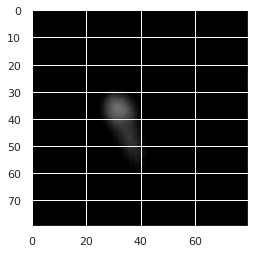

''

In [ ]:
show_image(image)

In [ ]:
build_area_roi = image[start_y:end_y, start_x:end_x]
build_area_roi = cv2.cvtColor(build_area_roi, cv2.COLOR_BGR2GRAY)
build_area_roi

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

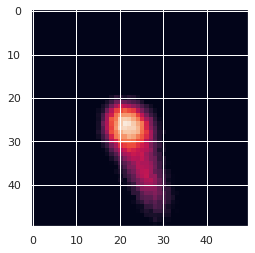

''

In [ ]:
show_image(build_area_roi)

0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
0 0 0 -1
1 -2 3 4
gradient_full_width increased
4 -7 3 9
gradient_full_width increased
9 -12 5 11
gradient_full_width increased
13 -13 4 13
gradient_full_width increased
20 -14 6 14
gradient_full_width increased
20 -18 8 14
23 -22 8 16
gradient_full_width increased
22 -23 9 16
29 -23 8 17
gradient_full_width increased
23 -23 9 17
21 -22 10 17
20 -20 8 17
17 -19 9 16
16 -18 9 16
16 -14 8 16
14 -13 8 14
11 -13 9 15
14 -10 7 14
11 -13 8 14
14 -12 7 13
13 -13 5 13
17 -12 7 13
14 -12 5 13
14 -12 6 12
10 -11 7 13
11 -10 5 12
9 -9 6 12
10 -7 4 12
9 -5 3 10
5 -6 5 9
5 -6 4 8
2 -3 3 6


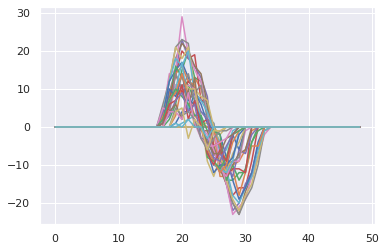

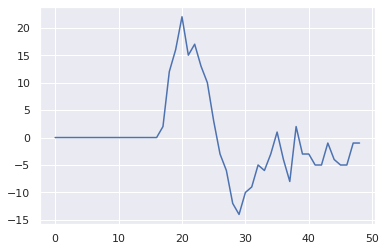

0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
0 0 0 6
3 -3 3 23
6 -4 8 26
11 -5 20 26
16 -8 26 30
17 -10 9 22
21 -10 9 20
24 -11 9 21
22 -14 9 19
22 -14 9 22
19 -13 10 30
18 -14 10 28
13 -11 8 24
9 -10 9 17
8 -6 7 15
5 -4 8 10
2 -1 1 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5
0 0 0 5


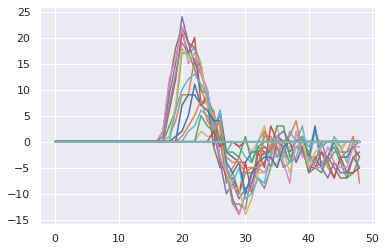

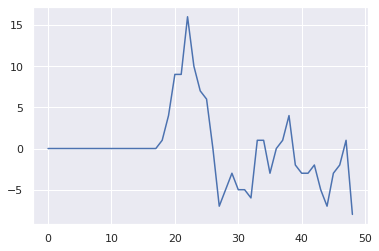

In [ ]:
# ret_val, image = cap.read()
# frame_index +=1

build_area_roi = image[start_y:end_y, start_x:end_x]
build_area_roi = cv2.cvtColor(build_area_roi, cv2.COLOR_BGR2GRAY)

# calculate the rectangle

cnts = cv2.findContours(build_area_roi, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

sorted_contours = sorted(cnts, key=cv2.contourArea, reverse=True)

# Get top 2 contours (2nd largest if available) and combine their points to get encompassing rectangle.
largest_contour = sorted_contours[0]
top_contour_points = largest_contour


try:
  ellipse = cv2.fitEllipse(largest_contour)
  (xc,yc),(d1,d2),angle = ellipse
  if(angle > 90):
    angle = -(180-angle)
  rotated = rotate(build_area_roi,angle,(xc,yc))
  rotated = rotated.astype(np.int16)
except:
  try:
    rotated_rectangle = cv2.minAreaRect(top_contour_points)
    rotated_box = cv2.boxPoints(rotated_rectangle)
    rotated_box = np.int0(rotated_box)
    
    # coordinates
    x0,y0 = rotated_box[0]
    x1,y1 = rotated_box[1]
    x2,y2 = rotated_box[2]
    x3,y3 = rotated_box[3]

    node1 = rotated_box[0]
    node2 = closest_node(rotated_box[0], rotated_box[1:])

    side = node2 - node1
    angle = np.arctan(side[1]/side[0])
    angle # in radians
    angle = np.degrees(angle)

    center = (0.25*(x0+x1+x2+x3),0.25*(y0+y1+y2+y3))
  except:
    angle = 0
    center = (0, 0)

rotated = rotate(build_area_roi,angle,center)

nrows,ncols = rotated.shape
rotated = rotated.astype(np.int16)
df.loc[frame_index,'Frame_Index'] = frame_index

# values
# res = []
selected_row = 0
last_full_width = 0
gradient_max_value,gradient_min_value,gradient_width,gradient_full_width = (-1,-1,-1,-1)

# iterate iver rows

for i in range(nrows):  
  aux = (rotated[i,1:] - rotated[i,:-1])
  aux_2 = (aux[1:] - aux[:-1])
  x = np.array([i for i in range(nrows-1)])
  plt.plot(x, aux, label='row {}'.format(str(i)))  
  # res.append(aux)
  gradient_max_value = np.max(aux, axis=0)
  gradient_min_value = np.min(aux, axis=0)
  gradient_width = np.argmin(aux, axis=0) - np.argmax(aux, axis=0)
  try:
    change_sign = (np.diff(np.sign(aux)) != 0)*1
    itemindex = np.where(change_sign==1)
    itemindex = np.array(itemindex)
    gradient_full_width = np.max(itemindex) - np.min(itemindex)
  except:
    full_width=0
  print(gradient_max_value,gradient_min_value,gradient_width,gradient_full_width)
  if (gradient_full_width > last_full_width):
    selected_row = i
    print('gradient_full_width increased')
    last_full_width = gradient_full_width
    slope_min_max = (gradient_max_value-gradient_min_value)/gradient_full_width
    slope_min_max = np.round(slope_min_max,1)
    df.loc[frame_index,df_columns[1:6]] = [gradient_max_value,gradient_min_value,gradient_width,gradient_full_width,slope_min_max]
plt.show() 

# selected one
i = selected_row
aux = (rotated[1:,i] - rotated[:-1,i])
aux_2 = (aux[1:] - aux[:-1])
plt.plot(x, aux, label='row {}'.format(str(i)))
plt.show() 

last_full_width = 0
# iterate over columns
last_full_width = 0
for i in range(ncols):  
  aux = (rotated[1:,i] - rotated[:-1,i])
  aux_2 = (aux[1:] - aux[:-1])
  plt.plot(x, aux, label='row {}'.format(str(i)))
  # res.append(aux)
  gradient_max_value = np.max(aux, axis=0)
  gradient_min_value = np.min(aux, axis=0)
  gradient_width = np.argmin(aux, axis=0) - np.argmax(aux, axis=0)
  try:
    change_sign = (np.diff(np.sign(aux)) != 0)*1
    itemindex = np.where(change_sign==1)
    itemindex = np.array(itemindex)
    gradient_full_width = np.max(itemindex) - np.min(itemindex)
  except:
    full_width=0
  print(gradient_max_value,gradient_min_value,gradient_width,gradient_full_width)
  if (gradient_full_width > last_full_width):
    selected_col = i
    last_full_width = gradient_full_width
    slope_min_max = (gradient_max_value-gradient_min_value)/gradient_full_width
    slope_min_max = np.round(slope_min_max,1)
    df.loc[frame_index,df_columns[6:11]] = [gradient_max_value,gradient_min_value,gradient_width,gradient_full_width,slope_min_max]
plt.show() 
i = selected_col
aux = (rotated[1:,i] - rotated[:-1,i])
plt.plot(x, aux, label='row {}'.format(str(i)))
plt.show() 

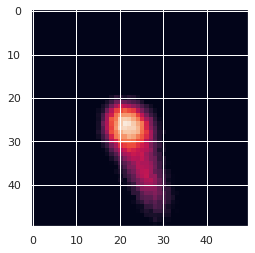

''

In [ ]:
show_image(build_area_roi)

159.6796112060547
-20.320388793945312


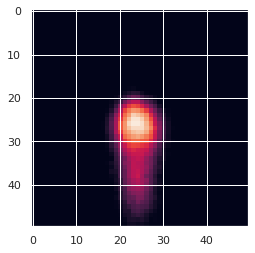

''

In [ ]:
ellipse = cv2.fitEllipse(largest_contour)
(xc,yc),(d1,d2),angle = ellipse
if(angle > 90):
  angle = -(180-angle)
rotated = rotate(build_area_roi,angle,(xc,yc))
rotated = rotated.astype(np.int16)
show_image(rotated)

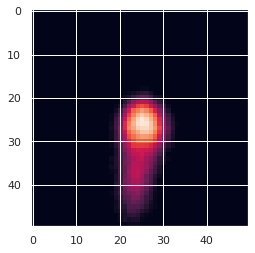

''

In [ ]:
show_image(rotated)

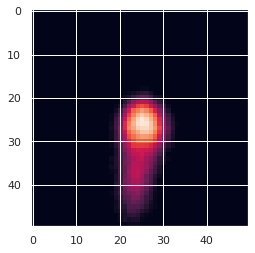

''

In [ ]:
show_image(rotated)

In [ ]:
rotated

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [ ]:
np.savetxt("one_frame.csv", rotated, delimiter=",")

In [ ]:
i=28

In [ ]:
rotated[i,1:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         7,   7,  21,  31,  54,  73,  93, 114, 120, 120, 118, 105,  84,
        62,  36,  17,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int16)

In [ ]:
rotated[i,:-1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   7,   7,  21,  31,  54,  73,  93, 114, 120, 120, 118, 105,
        84,  62,  36,  17,   4,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int16)

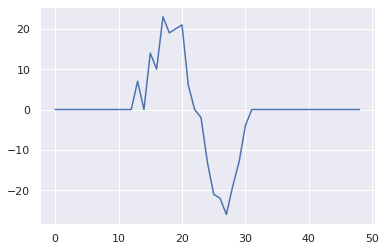

In [ ]:
aux = (rotated[i,1:] - rotated[i,:-1])
plt.plot(x, aux, label='row {}'.format(str(i)))

In [ ]:
b